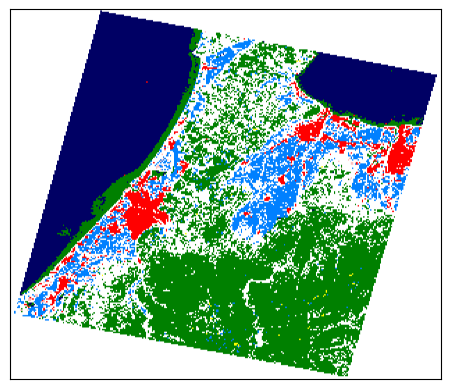

In [1]:
import re
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

result_csv_name = "/home/haselab/Documents/tat/Research/app/ai-step2/merged/4/merged.csv"

# 土地被覆図の画素について辞書作成 (BGR)
dic = {
    0: (0, 100, 128),
    1: (0, 0, 255),
    2: (191, 193, 255),
    3: (0, 128, 0),
    4: (0, 255, 255),
    5: (255, 128, 0),
    6: (100, 0, 0),
}

cell_size = 32

# CSVファイルを読み込む
df = pd.read_csv(result_csv_name, header=None)

ref_file = df[0][0]
# グリッドのサイズを取得
cols = int(re.findall(r"\d+", str(ref_file))[-3])
rows = int(re.findall(r"\d+", str(ref_file))[-4])

# グリッド画像のサイズを計算
width = cell_size * cols
height = cell_size * rows

# 空の画像を作成（白色の背景）
inference_img = np.ones((height, width, 3), dtype=np.uint8) * 255

# 各セルにデフォルトの値を設定
default_img = np.ones((cell_size, cell_size, 3), dtype=np.uint8) * 255

for i in range(len(df)):
    filename = df.iloc[i, 0]
    cell_value = int(df.iloc[i, 1])

    match = re.search(r'_(\d+)_(\d+).png$', filename)
    if match:
        row = int(match.group(1))
        col = int(match.group(2))

        if cell_value in dic:
          img = np.ones((cell_size, cell_size, 3), dtype=np.uint8) * 255
          img[:,:] = dic[cell_value]

        else:
          img = default_img

        inference_img[row * cell_size:(row + 1) * cell_size, col * cell_size:(col + 1) * cell_size] = img

img_rgb = inference_img[:, :, [2, 1, 0]]

#################################################################################
# 画像を保存します
#  ファイル名は，「result_img_(日時).png」となります
#################################################################################
pil_image = Image.fromarray(img_rgb)
# pil_image.save(result_img_name)

# 結果の表示
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(pil_image)